In [1]:
import sys
import os


notebook_path = os.getcwd()
sys.path.append(os.path.join(notebook_path, '..', 'src'))


from controlGUI import ple, pl, live, GUI, LaserStabilizer, VirtualLaserStabilizerCore, change_to_inline
from virtual_device import VirtualScanner, virtual_read_counts
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# initialize all classes and functions, bind them to devices wanted

config = {
    
    "scanner": {
        "type": "VirtualScanner",
    },
    
    "counter": {
        "type": "virtual_read_counts",
    },
    
    "laser_stabilizer_core": {
        "type": "VirtualLaserStabilizerCore",
        'config_instances':'config_instances'
    },
    
    "laser_stabilizer": {
        "type": "LaserStabilizer",
        'config_instances':'config_instances'
    },
    
    
}

def initialize_classes(config):
    instances = {}
    
    for key, params in config.items():
        if 'config_instances' not in params:
            type_name = params.pop('type')
            class_or_func = globals()[type_name]
            
            if callable(class_or_func):
                if hasattr(class_or_func, '__call__') and not hasattr(class_or_func, '__bases__'):
                    instances[key] = class_or_func
                else:
                    instances[key] = class_or_func(**params)

    for key, params in config.items():
        if 'config_instances' in params:
            type_name = params.pop('type')
            class_or_func = globals()[type_name]
            params.pop('config_instances')  # Remove the config_instances key
            instances[key] = class_or_func(instances, **params)
    
    return instances



config_instances = initialize_classes(config)
print(config_instances)


{'scanner': <virtual_device.VirtualScanner object at 0x000001B768F74688>, 'counter': <function virtual_read_counts at 0x000001B750D65B88>, 'laser_stabilizer_core': <controlGUI.VirtualLaserStabilizerCore object at 0x000001B769C8EAC8>, 'laser_stabilizer': <LaserStabilizer(Thread-8, initial daemon)>}


In [3]:
help(ple)

Help on function ple in module controlGUI:

ple(wavelength_array, exposure, config_instances)



<IPython.core.display.Javascript object>


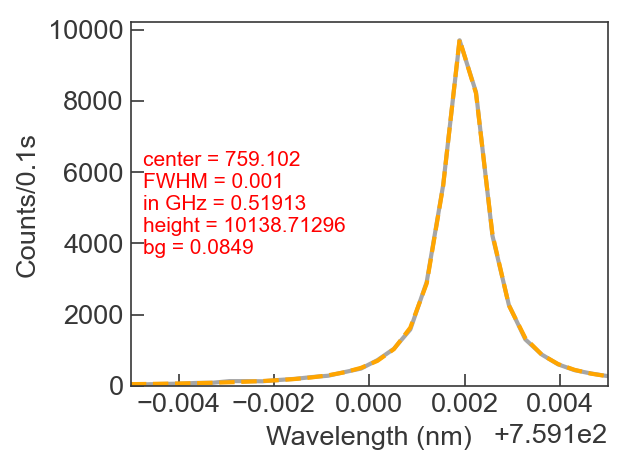

In [4]:
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':759.102}
fig, data_figure = ple(np.linspace(759.1-0.005,759.1+0.005,30), exposure=0.1, \
                                config_instances={**config_instances, **ple_test_dict})

In [5]:
data_figure.data

[array([759.095     , 759.09534483, 759.09568966, 759.09603448,
        759.09637931, 759.09672414, 759.09706897, 759.09741379,
        759.09775862, 759.09810345, 759.09844828, 759.0987931 ,
        759.09913793, 759.09948276, 759.09982759, 759.10017241,
        759.10051724, 759.10086207, 759.1012069 , 759.10155172,
        759.10189655, 759.10224138, 759.10258621, 759.10293103,
        759.10327586, 759.10362069, 759.10396552, 759.10431034,
        759.10465517, 759.105     ]),
 array([  54.,   47.,   57.,   65.,   85.,   91.,  136.,  136.,  131.,
         168.,  200.,  249.,  287.,  389.,  488.,  724., 1042., 1584.,
        2918., 5633., 9700., 8243., 4217., 2272., 1307.,  882.,  605.,
         443.,  350.,  277.])]

In [6]:
data_figure.lorent()

In [7]:
data_figure.save()

In [8]:
help(pl)

Help on function pl in module controlGUI:

pl(center, coordinates_x, coordinates_y, exposure, config_instances, is_dis=False, wavelength=None)
    example
    
    >>> pl(center=[0, 0], coordinates_x=np.linspace(-5,5,10),         coordinates_y=np.linspace(-5,5,10), exposure=0.2)



<IPython.core.display.Javascript object>


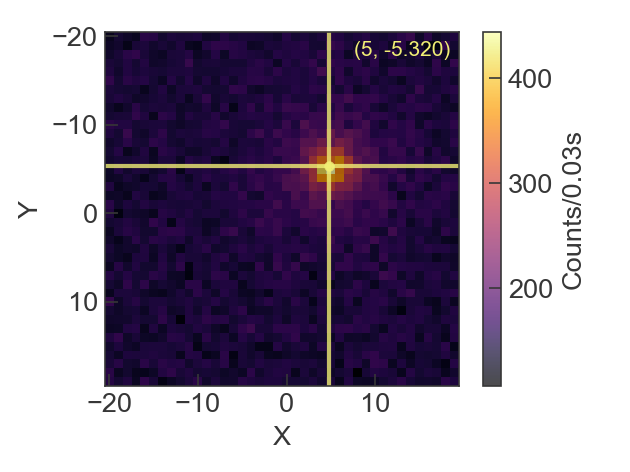

In [9]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
fig, data_figure = pl(center=[0,0], coordinates_x=np.arange(-20,20,1), \
                               coordinates_y=np.arange(-20,20,1), exposure=0.03, \
                               config_instances={**config_instances, **pl_test_dict})

<IPython.core.display.Javascript object>


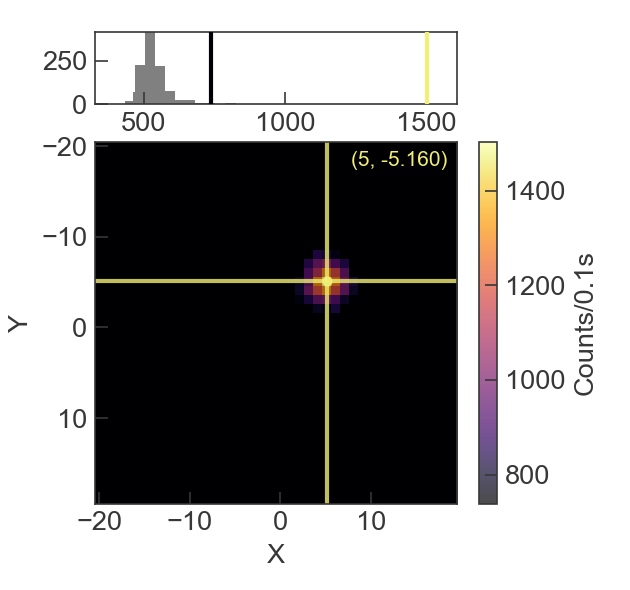

In [10]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
fig, data_figure = pl(center=[0,0], coordinates_x=np.arange(-20,20,1), \
                               coordinates_y=np.arange(-20,20,1), exposure=0.1, is_dis=True,\
                               wavelength = 2, config_instances={**config_instances, **pl_test_dict})

In [11]:
data_figure.save('NV_')

In [12]:
help(live)

Help on function live in module controlGUI:

live(data_array, exposure, config_instances, wavelength=None, is_finite=False)



<IPython.core.display.Javascript object>


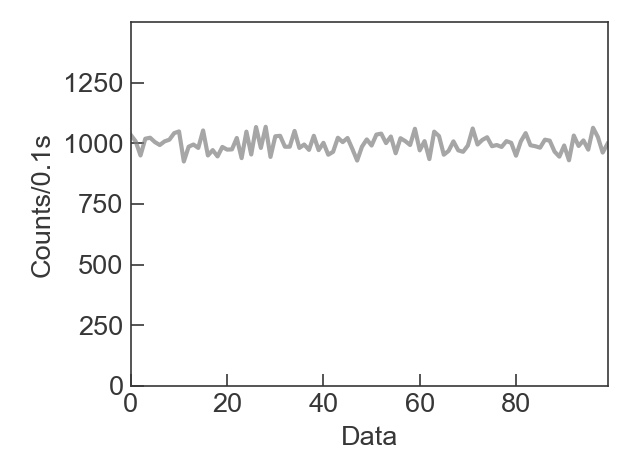

In [13]:
fig, data_figure = live(np.arange(100), exposure=0.1, wavelength=None, 
                                           is_finite=True, config_instances=config_instances)

<IPython.core.display.Javascript object>


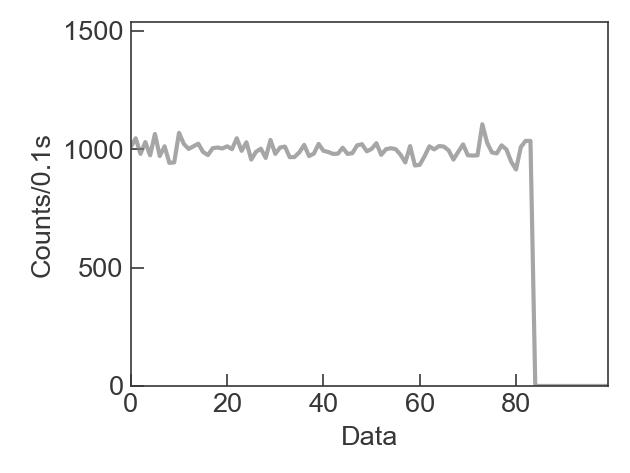

In [15]:
fig, data_figure = live(np.arange(100), exposure=0.1, config_instances=config_instances)

In [7]:
help(GUI)

Help on function GUI in module controlGUI:

GUI(config_instances)
    The function opens pyqt GUI for PLE, PL, live counts, and pulse control.
    Save button will also output data and figure to jupyter notebook.
    
    Examples
    --------
    >>> GUI()



<IPython.core.display.Javascript object>


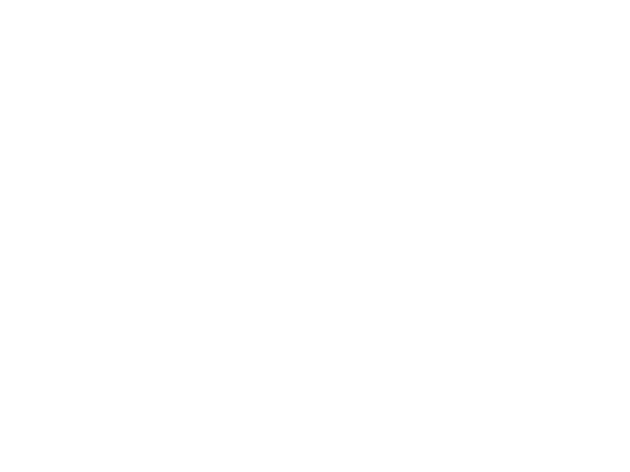

<IPython.core.display.Javascript object>


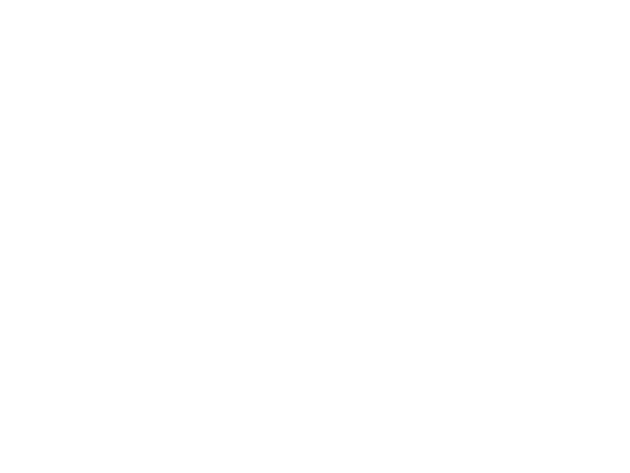

<IPython.core.display.Javascript object>


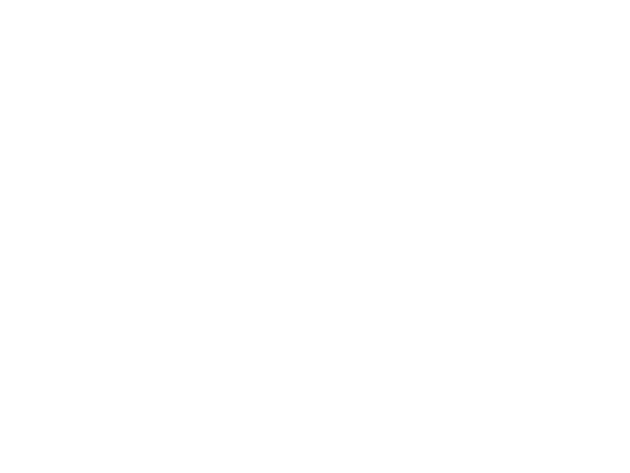


        1719300023.7819996
        


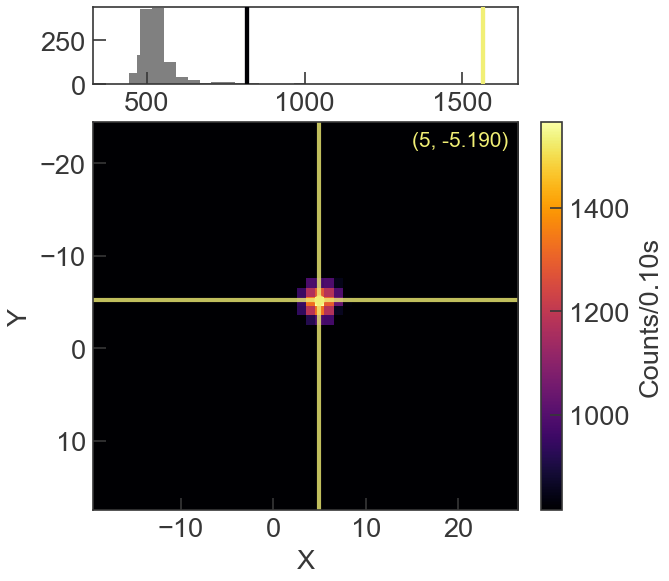


        1719300128.5890841
        


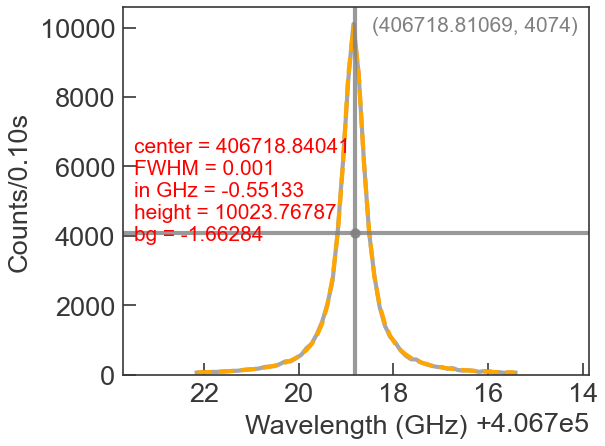


        1719300143.5593815
        


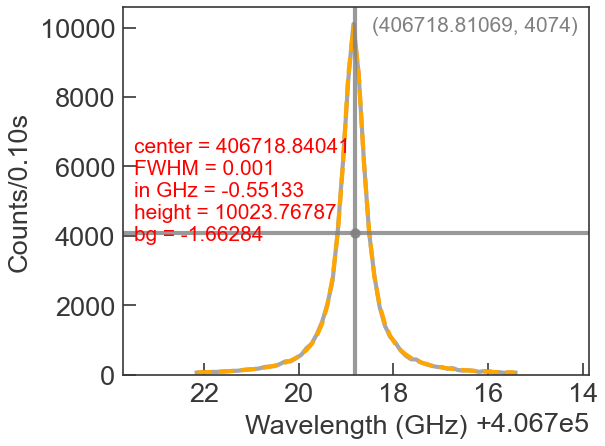

In [8]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.10}
GUI(config_instances={**config_instances, **pl_test_dict, **ple_test_dict})

Text(0, 0.5, 'y')

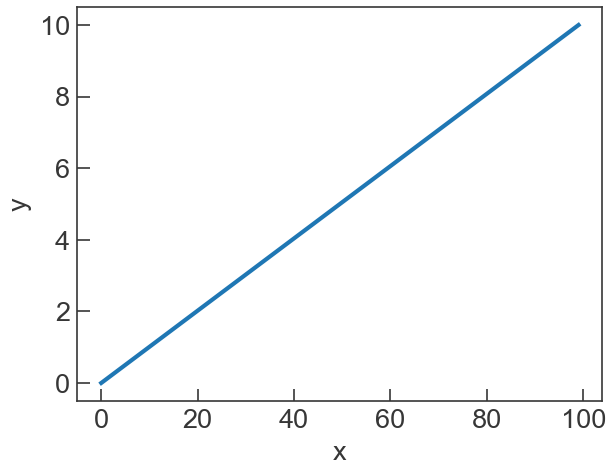

In [9]:
change_to_inline() #otherwise display error
plt.close()
plt.tight_layout()
plt.plot(np.linspace(0, 10, 100))
plt.xlabel('x')
plt.ylabel('y')